<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r7-bal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r7/2-fft-normal-n-0-3-r7.csv?token=AKVFSOEBQ2WA73YWVT2UL6S6ZME6S')
print(df.shape)
df

(62342, 30)


,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,11,0,3,1,1,4,3,9,3,3,23,7,2,1,1,1.0,8,12,1,12,12,144,0,1,4,8,3,27,9,1
1,23,0,3,1,1,4,3,9,0,0,23,7,1,4,4,1.0,20,11,2,12,22,264,0,1,4,4,3,27,9,1
2,50,3,0,4,1,1,5,17,23,7,3,3,2,1,0,0.0,4,10,3,12,30,360,0,4,4,8,20,85,100,1
3,51,3,0,4,2,2,5,17,23,7,3,3,2,1,0,0.0,5,9,4,12,36,432,0,8,16,32,20,85,100,1
4,52,3,0,4,3,2,5,17,23,7,3,3,2,1,0,0.0,6,8,5,12,40,480,0,12,24,48,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62337,3269155,1,3,5,2,2,3,9,3,3,27,11,20046,2,1,0.5,15,5,2,6,10,60,3,10,20,400920,15,27,45,1
62338,3269162,1,3,5,3,2,3,9,3,3,27,11,20046,2,1,0.5,22,4,3,6,12,72,3,15,30,601380,15,27,45,1
62339,3269169,1,3,5,4,2,3,9,3,3,27,11,20046,2,1,0.5,29,3,4,6,12,72,3,20,40,801840,15,27,45,1
62340,3269176,1,3,5,5,3,3,9,3,3,27,11,20046,2,1,0.5,36,2,5,6,10,60,3,25,75,1503450,15,27,45,1


In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r7/2-fft-malicious-n-0-3-m-1-r7.csv?token=AKVFSOE6WF5YGJX3AS6IMBK6ZMFAG',nrows = 50000)
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r7/2-fft-malicious-n-0-3-m-6-r7.csv?token=AKVFSOAEMEZIKBJXTCSSA326ZMFAI',nrows = 50000)
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r7/2-fft-malicious-n-0-3-m-9-r7.csv?token=AKVFSODOGU7WUNRXPRBGOCC6ZMFAK',nrows = 50000)
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r7/2-fft-malicious-n-0-3-m-14-r7.csv?token=AKVFSOCEONE5MOSJAJFHRJC6ZMFAO',nrows = 50000)

df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r7/2-fft-normal-n-0-5-r7.csv?token=AKVFSOENCFHVTECA3EB6PIC6ZMFEK')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r7/2-fft-normal-n-0-12-r7.csv?token=AKVFSOEVHKUMUNTTHMGF2QK6ZMFEM')
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r7/2-fft-normal-n-0-15-r7.csv?token=AKVFSOBBBVVPLI2LIVOHW7C6ZMFEQ')

In [0]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df11.shape)
print(df12.shape)
print(df13.shape)

(50000, 30)
(50000, 30)
(50000, 30)
(50000, 30)
(41492, 30)
(37606, 30)
(48449, 30)


In [0]:
df = df.append(df1, ignore_index=True,sort=False)
df = df.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)
df = df.append(df13, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [0]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,11,0,3,1,1,4,3,9,3,3,23,7,2,1,1,1.0,8,12,1,12,12,144,0,1,4,8,3,27,9,1
1,11,0,3,1,1,4,3,9,3,3,23,7,2,1,1,1.0,8,17,1,17,17,289,0,1,4,8,3,27,9,0
2,11,0,3,1,1,4,3,9,3,3,23,7,2,1,1,1.0,8,17,1,17,17,289,0,1,4,8,3,27,9,0
3,11,0,3,1,1,4,3,9,3,3,23,7,3,1,1,1.0,8,17,1,17,17,289,0,1,4,12,3,27,9,0
4,11,0,3,1,1,4,3,9,3,3,23,7,2,1,1,1.0,8,17,1,17,17,289,0,1,4,8,3,27,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389884,3275541,1,0,4,2,2,5,17,23,7,15,15,20060,2,0,0.0,5,5,5,9,25,225,0,8,16,320960,20,85,100,1
389885,3275542,1,0,4,3,2,5,17,23,7,15,15,20060,2,0,0.0,6,4,6,9,24,216,0,12,24,481440,20,85,100,1
389886,3275543,4,0,3,1,4,3,9,23,7,22,6,20060,1,0,0.0,7,3,7,9,21,189,0,3,12,240720,9,27,27,1
389887,3275544,1,0,4,4,2,5,17,23,7,15,15,20060,2,0,0.0,8,2,8,9,16,144,0,16,32,641920,20,85,100,1


In [0]:
df.shape

(389889, 30)

Test Data

In [0]:
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r7/2-fft-malicious-n-0-3-m-2-r7.csv?token=AKVFSOG2OH2JU5KXZP6XPJC6ZMFIE',nrows = 30000)
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r7/2-fft-malicious-n-0-3-m-5-r7.csv?token=AKVFSOCIUTPTBNFNLFTJW7C6ZMFIG',nrows = 30000)
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r7/2-fft-malicious-n-0-3-m-10-r7.csv?token=AKVFSOGNREDF3YLUAGG6FOK6ZMFIK',nrows = 30000)
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r7/2-fft-malicious-n-0-3-m-12-r7.csv?token=AKVFSOG2JQLC4MRCOH52MKK6ZMFIM',nrows = 30000)
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r7/2-fft-malicious-n-0-3-m-13-r7.csv?token=AKVFSOFQS6CSPZ4FTBFKQSK6ZMFIQ',nrows = 30000)
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r7/2-fft-malicious-n-0-3-m-15-r7.csv?token=AKVFSOAJQGH5YQXHXH6SZOK6ZMFIU',nrows = 30000)

df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r7/2-fft-normal-n-0-10-r7.csv?token=AKVFSOHNMFFF5U24DJYDACS6ZMFNG',nrows = 30000)
df5.shape

(30000, 30)

In [0]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,11,0,3,1,1,4,3,9,3,3,23,7,3,1,1,1.00,8,17,1,17,17,289,0,1,4,12,3,27,9,0
1,15,0,3,1,1,4,3,10,2,2,23,7,2,2,2,1.00,12,16,2,17,32,544,0,1,4,8,3,30,9,0
2,23,0,3,1,1,4,3,9,0,0,23,7,1,4,4,1.00,20,15,3,17,45,765,0,1,4,4,3,27,9,0
3,50,3,0,4,1,1,5,17,23,7,3,3,3,1,0,0.00,4,14,4,17,56,952,0,4,4,12,20,85,100,0
4,51,3,0,4,2,2,5,17,23,7,3,3,3,1,0,0.00,5,13,5,17,65,1105,0,8,16,48,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1637539,3,4,4,3,2,5,17,20,4,3,3,11429,4,3,0.75,19,1,1,1,1,1,12,12,24,274296,20,85,100,0
29996,1637540,3,4,4,4,2,5,17,20,4,3,3,11429,4,3,0.75,20,1,1,1,1,1,12,16,32,365728,20,85,100,0
29997,1637543,3,4,4,5,3,5,17,20,4,3,3,11429,4,3,0.75,23,1,1,1,1,1,12,20,60,685740,20,85,100,0
29998,1638300,3,4,4,1,1,5,17,20,4,3,3,11433,4,3,0.75,16,1,1,1,1,1,12,4,4,45732,20,85,100,0


In [0]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [0]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.558412,-0.343281,-0.025743,0.040547,0.692029,0.708818,-0.059981,0.304852,-0.288750,-0.579104,-0.581242,-0.120073,0.083080,-0.023369,-0.029160,-0.034446,0.259803,-0.235695,-0.165012,-0.153610,0.307647,0.705486,0.599150,-0.097133
inport,-0.558412,1.000000,0.099401,-0.036143,0.056935,-0.417963,-0.507354,0.000994,0.155973,0.588626,0.824518,0.548608,-0.014679,-0.198976,-0.134968,-0.120964,-0.098745,0.452956,0.060949,0.044260,0.035486,-0.278923,-0.471531,-0.404325,0.008954
cache_coherence_type,-0.343281,0.099401,1.000000,0.194425,-0.306327,-0.335826,-0.353147,0.055430,-0.213601,-0.003994,0.127159,-0.040071,0.075796,-0.049012,0.016920,0.024935,0.028886,-0.158317,0.457847,0.370491,0.291737,0.569715,-0.343628,0.037099,0.022934
flit_id,-0.025743,-0.036143,0.194425,1.000000,0.070994,0.200015,0.170702,0.007430,-0.012888,-0.027225,-0.029735,0.301644,-0.059782,0.099605,0.025157,0.008983,0.005729,-0.038434,0.936493,0.898207,0.643517,0.342252,0.188026,0.288685,-0.006512
flit_type,0.040547,0.056935,-0.306327,0.070994,1.000000,-0.315170,-0.268981,-0.011776,0.020309,0.042886,0.046840,0.341477,-0.055328,0.066162,0.006844,0.003578,0.004090,0.060526,0.012836,0.267539,0.190505,-0.539267,-0.296278,-0.454877,0.010286
vnet,0.692029,-0.417963,-0.335826,0.200015,-0.315170,1.000000,0.974721,-0.051130,0.207493,-0.230239,-0.439709,-0.516342,-0.090451,0.086004,-0.002810,-0.019377,-0.028795,0.183091,-0.039453,-0.069362,-0.083119,0.582787,0.990968,0.928817,-0.080132
vc,0.708818,-0.507354,-0.353147,0.170702,-0.268981,0.974721,1.000000,-0.047467,0.143924,-0.336504,-0.547851,-0.557816,-0.075451,0.121819,0.029291,0.013276,-0.000005,0.102725,-0.065839,-0.084669,-0.092404,0.545788,0.995078,0.895184,-0.066941
traversal_id,-0.059981,0.000994,0.055430,0.007430,-0.011776,-0.051130,-0.047467,1.000000,-0.018206,0.000958,0.014017,0.037164,-0.103057,-0.102998,-0.130167,-0.114890,-0.103033,-0.053703,0.027144,0.021369,0.553448,0.003209,-0.049275,-0.032440,0.072014
hop_count,0.304852,0.155973,-0.213601,-0.012888,0.020309,0.207493,0.143924,-0.018206,1.000000,0.655109,0.219738,0.220280,-0.149677,-0.133493,-0.178881,-0.163728,-0.141410,0.357982,-0.126414,-0.092920,-0.078880,-0.003240,0.174675,0.136107,0.088783
current_hop,-0.288750,0.588626,-0.003994,-0.027225,0.042886,-0.230239,-0.336504,0.000958,0.655109,1.000000,0.774067,0.636824,-0.062827,-0.208630,-0.171482,-0.155394,-0.129527,0.420998,-0.006912,-0.003929,-0.001882,-0.204332,-0.294412,-0.245837,0.009770


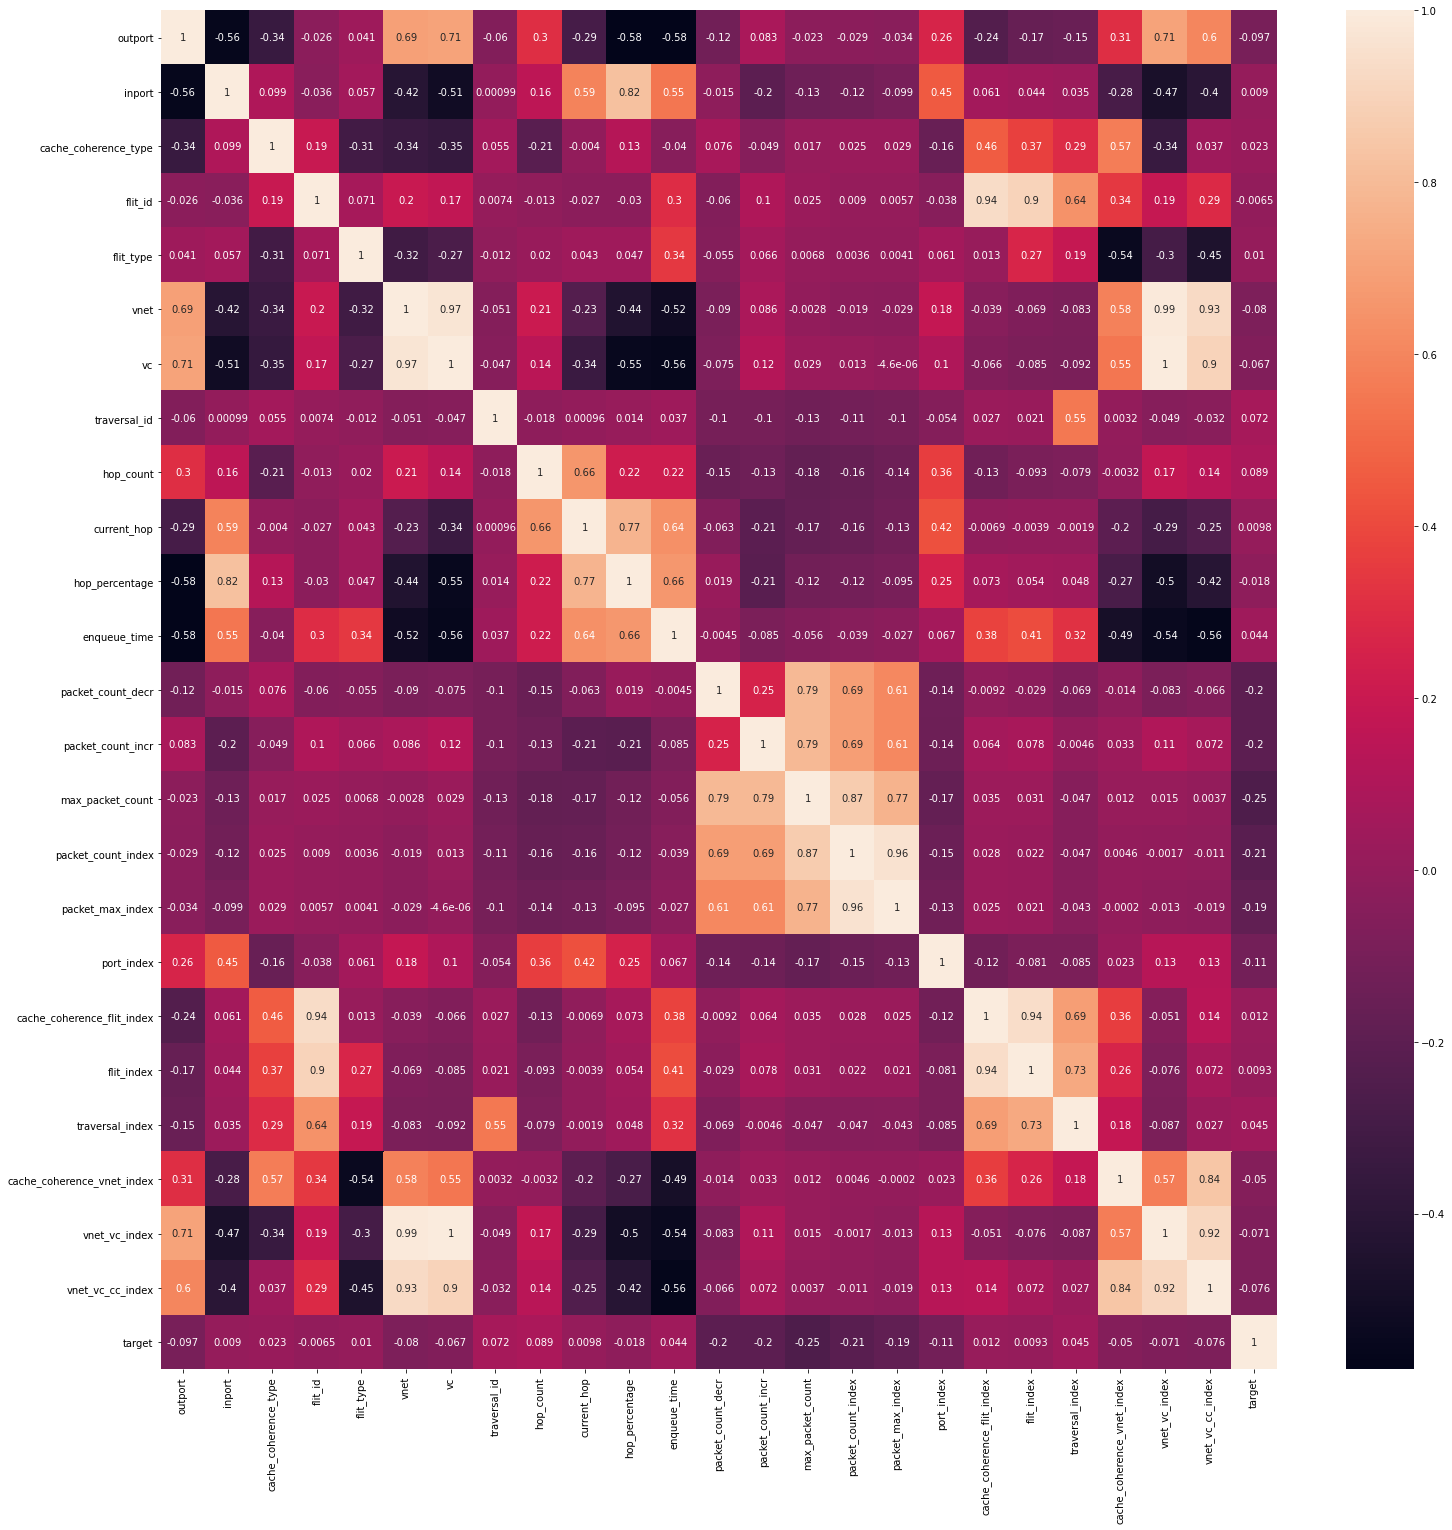

In [0]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0,3,1,1,4,3,9,2,1,1,1.0,8,12,1,12,12,144,0,1,4,8,3,27,9
1,0,3,1,1,4,3,9,2,1,1,1.0,8,17,1,17,17,289,0,1,4,8,3,27,9
2,0,3,1,1,4,3,9,2,1,1,1.0,8,17,1,17,17,289,0,1,4,8,3,27,9
3,0,3,1,1,4,3,9,3,1,1,1.0,8,17,1,17,17,289,0,1,4,12,3,27,9
4,0,3,1,1,4,3,9,2,1,1,1.0,8,17,1,17,17,289,0,1,4,8,3,27,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389884,1,0,4,2,2,5,17,20060,2,0,0.0,5,5,5,9,25,225,0,8,16,320960,20,85,100
389885,1,0,4,3,2,5,17,20060,2,0,0.0,6,4,6,9,24,216,0,12,24,481440,20,85,100
389886,4,0,3,1,4,3,9,20060,1,0,0.0,7,3,7,9,21,189,0,3,12,240720,9,27,27
389887,1,0,4,4,2,5,17,20060,2,0,0.0,8,2,8,9,16,144,0,16,32,641920,20,85,100


In [0]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.00005,0.166667,0.2,1.0,0.058824,0.297297,0.000000,0.297297,0.029024,0.009904,0.0,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000
1,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.00005,0.166667,0.2,1.0,0.058824,0.432432,0.000000,0.432432,0.042216,0.019946,0.0,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000
2,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.00005,0.166667,0.2,1.0,0.058824,0.432432,0.000000,0.432432,0.042216,0.019946,0.0,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000
3,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.00010,0.166667,0.2,1.0,0.058824,0.432432,0.000000,0.432432,0.042216,0.019946,0.0,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
4,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.00005,0.166667,0.2,1.0,0.058824,0.432432,0.000000,0.432432,0.042216,0.019946,0.0,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389884,0.25,0.00,0.500000,0.25,0.333333,1.0,0.727273,1.00000,0.333333,0.0,0.0,0.014706,0.108108,0.108108,0.216216,0.063325,0.015514,0.0,0.241379,0.139535,0.177785,0.944444,0.794521,1.000000
389885,0.25,0.00,0.500000,0.50,0.333333,1.0,0.727273,1.00000,0.333333,0.0,0.0,0.029412,0.081081,0.135135,0.216216,0.060686,0.014890,0.0,0.379310,0.232558,0.266678,0.944444,0.794521,1.000000
389886,1.00,0.00,0.333333,0.00,1.000000,0.0,0.000000,1.00000,0.166667,0.0,0.0,0.044118,0.054054,0.162162,0.216216,0.052770,0.013020,0.0,0.068966,0.093023,0.133338,0.333333,0.000000,0.197802
389887,0.25,0.00,0.500000,0.75,0.333333,1.0,0.727273,1.00000,0.333333,0.0,0.0,0.058824,0.027027,0.189189,0.216216,0.039578,0.009904,0.0,0.517241,0.325581,0.355572,0.944444,0.794521,1.000000


In [0]:
train_X[train_X.duplicated()].shape

(9019, 24)

In [0]:
test_X = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df5['target']

In [0]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.00,0.75,0.0,0.00,1.000000,0.0,0.000000,0.000175,0.166667,0.2,1.00,0.058824,0.444444,0.000000,0.444444,0.044444,0.021563,0.0,0.000000,0.000000,0.000008,0.000000,0.000000,0.0
1,0.00,0.75,0.0,0.00,1.000000,0.0,0.090909,0.000087,0.333333,0.4,1.00,0.117647,0.416667,0.027778,0.444444,0.086111,0.040656,0.0,0.000000,0.000000,0.000004,0.000000,0.041096,0.0
2,0.00,0.75,0.0,0.00,1.000000,0.0,0.000000,0.000000,0.666667,0.8,1.00,0.235294,0.388889,0.055556,0.444444,0.122222,0.057203,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.75,0.00,0.5,0.00,0.000000,1.0,0.727273,0.000175,0.166667,0.0,0.00,0.000000,0.361111,0.083333,0.444444,0.152778,0.071204,0.0,0.103448,0.000000,0.000008,0.944444,0.794521,1.0
4,0.75,0.00,0.5,0.25,0.333333,1.0,0.727273,0.000175,0.166667,0.0,0.00,0.014706,0.333333,0.111111,0.444444,0.177778,0.082659,0.0,0.241379,0.139535,0.000043,0.944444,0.794521,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.75,1.00,0.5,0.50,0.333333,1.0,0.727273,0.999650,0.666667,0.6,0.75,0.220588,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.379310,0.232558,0.267836,0.944444,0.794521,1.0
29996,0.75,1.00,0.5,0.75,0.333333,1.0,0.727273,0.999650,0.666667,0.6,0.75,0.235294,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.517241,0.325581,0.357115,0.944444,0.794521,1.0
29997,0.75,1.00,0.5,1.00,0.666667,1.0,0.727273,0.999650,0.666667,0.6,0.75,0.279412,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.655172,0.651163,0.669595,0.944444,0.794521,1.0
29998,0.75,1.00,0.5,0.00,0.000000,1.0,0.727273,1.000000,0.666667,0.6,0.75,0.176471,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.103448,0.000000,0.044652,0.944444,0.794521,1.0


In [0]:
test_X[test_X.duplicated()].shape

(0, 24)

In [0]:
test_X1 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df6['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)
test_X1

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000094,0.166667,0.2,1.00,0.058824,0.50000,0.00000,0.5,0.055556,0.030201,0.0,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
1,0.00,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000188,0.333333,0.4,1.00,0.117647,0.46875,0.03125,0.5,0.107639,0.056942,0.0,0.000000,0.000000,0.000008,0.000000,0.000000,0.000000
2,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.666667,0.8,1.00,0.235294,0.43750,0.06250,0.5,0.152778,0.080117,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.75,0.00,0.500000,0.00,0.000000,1.0,0.727273,0.000094,0.166667,0.0,0.00,0.000000,0.40625,0.09375,0.5,0.190972,0.099727,0.0,0.103448,0.000000,0.000004,0.944444,0.794521,1.000000
4,0.75,0.00,0.500000,0.25,0.333333,1.0,0.727273,0.000094,0.166667,0.0,0.00,0.014706,0.37500,0.12500,0.5,0.222222,0.115772,0.0,0.241379,0.139535,0.000029,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.75,1.00,0.500000,1.00,0.666667,1.0,0.727273,0.999719,0.666667,0.6,0.75,0.294118,0.00000,0.00000,0.0,0.000000,0.000000,1.0,0.655172,0.651163,0.667103,0.944444,0.794521,1.000000
29996,0.00,1.00,0.833333,0.00,0.000000,0.0,0.000000,1.000000,0.500000,0.6,1.00,0.176471,0.00000,0.00000,0.0,0.000000,0.000000,0.0,0.172414,0.023256,0.066725,0.833333,0.000000,0.494505
29997,0.00,1.00,0.833333,0.25,0.333333,0.0,0.000000,1.000000,0.500000,0.6,1.00,0.279412,0.00000,0.00000,0.0,0.000000,0.000000,0.0,0.379310,0.232558,0.266914,0.833333,0.000000,0.494505
29998,0.00,1.00,0.833333,0.50,0.333333,0.0,0.000000,1.000000,0.500000,0.6,1.00,0.382353,0.00000,0.00000,0.0,0.000000,0.000000,0.0,0.586207,0.372093,0.400373,0.833333,0.000000,0.494505


In [0]:
test_X2 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df7['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)
test_X2

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000089,0.166667,0.2,1.000000,0.065574,0.470588,0.000000,0.470588,0.049536,0.025399,0.00,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
1,0.00,0.25,0.000000,0.00,1.000000,0.0,0.000000,0.000179,0.333333,0.4,1.000000,0.131148,0.441176,0.029412,0.470588,0.095975,0.047888,0.00,0.000000,0.000000,0.000008,0.000000,0.000000,0.000000
2,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.666667,0.8,1.000000,0.262295,0.411765,0.058824,0.470588,0.136223,0.067378,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.75,0.00,0.500000,0.00,0.000000,1.0,0.727273,0.000089,0.166667,0.0,0.000000,0.000000,0.382353,0.088235,0.470588,0.170279,0.083870,0.00,0.103448,0.000000,0.000004,0.944444,0.794521,1.000000
4,0.75,0.00,0.500000,0.25,0.333333,1.0,0.727273,0.000089,0.166667,0.0,0.000000,0.016393,0.352941,0.117647,0.470588,0.198142,0.097363,0.00,0.241379,0.139535,0.000028,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.75,0.25,0.666667,0.50,0.333333,0.0,0.000000,0.999911,0.500000,0.4,0.666667,0.360656,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.482759,0.302326,0.335728,0.666667,0.000000,0.395604
29996,0.75,0.25,0.666667,0.75,0.333333,0.0,0.000000,0.999911,0.500000,0.4,0.666667,0.475410,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.655172,0.418605,0.447639,0.666667,0.000000,0.395604
29997,0.75,0.25,0.666667,1.00,0.666667,0.0,0.000000,0.999911,0.500000,0.4,0.666667,0.590164,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.827586,0.825581,0.839326,0.666667,0.000000,0.395604
29998,0.75,0.25,0.000000,0.00,1.000000,0.0,0.090909,1.000000,0.500000,0.4,0.666667,0.590164,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.044764,0.000000,0.041096,0.000000


In [0]:
test_X3 = df8.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df8['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)
test_X3

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000089,0.166667,0.2,1.00,0.059701,0.50000,0.00000,0.5,0.055556,0.030201,0.0,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
1,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.666667,0.8,1.00,0.238806,0.46875,0.03125,0.5,0.107639,0.056942,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00,0.25,0.000000,0.00,1.000000,0.0,0.000000,0.000178,0.833333,1.0,1.00,0.298507,0.43750,0.06250,0.5,0.152778,0.080117,0.0,0.000000,0.000000,0.000008,0.000000,0.000000,0.000000
3,0.75,0.00,0.500000,0.00,0.000000,1.0,0.727273,0.000089,0.166667,0.0,0.00,0.000000,0.40625,0.09375,0.5,0.190972,0.099727,0.0,0.103448,0.000000,0.000004,0.944444,0.794521,1.000000
4,0.75,0.00,0.500000,0.25,0.333333,1.0,0.727273,0.000089,0.166667,0.0,0.00,0.014925,0.37500,0.12500,0.5,0.222222,0.115772,0.0,0.241379,0.139535,0.000028,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.75,1.00,0.333333,0.00,1.000000,0.0,0.000000,0.999822,0.666667,0.6,0.75,0.223881,0.00000,0.00000,0.0,0.000000,0.000000,1.0,0.068966,0.093023,0.134805,0.333333,0.000000,0.197802
29996,0.75,1.00,0.500000,0.75,0.333333,1.0,0.727273,0.999822,0.666667,0.6,0.75,0.238806,0.00000,0.00000,0.0,0.000000,0.000000,1.0,0.517241,0.325581,0.359487,0.944444,0.794521,1.000000
29997,0.75,1.00,0.500000,1.00,0.666667,1.0,0.727273,0.999822,0.666667,0.6,0.75,0.283582,0.00000,0.00000,0.0,0.000000,0.000000,1.0,0.655172,0.651163,0.674041,0.944444,0.794521,1.000000
29998,0.75,1.00,0.500000,0.00,0.000000,1.0,0.727273,1.000000,0.666667,0.6,0.75,0.179104,0.00000,0.00000,0.0,0.000000,0.000000,1.0,0.103448,0.000000,0.044940,0.944444,0.794521,1.000000


In [0]:
test_X4 = df9.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df9['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)
test_X4

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.00,0.75,0.0,0.00,1.000000,0.0,0.000000,0.000089,0.166667,0.2,1.00,0.059701,0.444444,0.000000,0.444444,0.044444,0.021563,0.0,0.000000,0.000000,0.000004,0.000000,0.000000,0.0
1,0.00,0.25,0.0,0.00,1.000000,0.0,0.000000,0.000178,0.666667,0.8,1.00,0.238806,0.416667,0.027778,0.444444,0.086111,0.040656,0.0,0.000000,0.000000,0.000008,0.000000,0.000000,0.0
2,0.00,0.75,0.0,0.00,1.000000,0.0,0.000000,0.000000,0.666667,0.8,1.00,0.253731,0.388889,0.055556,0.444444,0.122222,0.057203,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.75,0.00,0.5,0.00,0.000000,1.0,0.727273,0.000089,0.166667,0.0,0.00,0.000000,0.361111,0.083333,0.444444,0.152778,0.071204,0.0,0.103448,0.000000,0.000004,0.944444,0.794521,1.0
4,0.75,0.00,0.5,0.25,0.333333,1.0,0.727273,0.000089,0.166667,0.0,0.00,0.014925,0.333333,0.111111,0.444444,0.177778,0.082659,0.0,0.241379,0.139535,0.000028,0.944444,0.794521,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.75,1.00,0.5,0.00,0.000000,1.0,0.727273,0.999288,0.666667,0.6,0.75,0.194030,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.103448,0.000000,0.044994,0.944444,0.794521,1.0
29996,0.75,1.00,0.5,0.25,0.333333,1.0,0.727273,0.999288,0.666667,0.6,0.75,0.208955,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.241379,0.139535,0.179987,0.944444,0.794521,1.0
29997,0.75,1.00,0.5,0.50,0.333333,1.0,0.727273,0.999288,0.666667,0.6,0.75,0.223881,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.379310,0.232558,0.269983,0.944444,0.794521,1.0
29998,0.75,1.00,0.5,0.75,0.333333,1.0,0.727273,0.999288,0.666667,0.6,0.75,0.238806,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.517241,0.325581,0.359978,0.944444,0.794521,1.0


In [0]:
test_X5 = df10.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df10['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)
test_X5

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000107,0.166667,0.2,1.0,0.065574,0.457143,0.000000,0.457143,0.046921,0.023394,0.0,0.000000,0.000000,0.000005,0.000000,0.000000,0.000000
1,0.00,0.25,0.000000,0.00,1.000000,0.0,0.000000,0.000213,0.333333,0.4,1.0,0.131148,0.428571,0.028571,0.457143,0.090909,0.044107,0.0,0.000000,0.000000,0.000009,0.000000,0.000000,0.000000
2,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.666667,0.8,1.0,0.262295,0.400000,0.057143,0.457143,0.129032,0.062058,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.75,0.00,0.500000,0.00,0.000000,1.0,0.727273,0.000107,0.166667,0.0,0.0,0.000000,0.371429,0.085714,0.457143,0.161290,0.077248,0.0,0.103448,0.000000,0.000005,0.944444,0.794521,1.000000
4,0.75,0.00,0.500000,0.25,0.333333,1.0,0.727273,0.000107,0.166667,0.0,0.0,0.016393,0.342857,0.114286,0.457143,0.187683,0.089676,0.0,0.241379,0.139535,0.000033,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.00,1.00,0.833333,0.25,0.333333,0.0,0.000000,0.999893,0.500000,0.6,1.0,0.311475,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.379310,0.232558,0.266663,0.833333,0.000000,0.494505
29996,0.00,1.00,0.833333,0.50,0.333333,0.0,0.000000,0.999893,0.500000,0.6,1.0,0.426230,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.586207,0.372093,0.399997,0.833333,0.000000,0.494505
29997,0.00,1.00,0.833333,0.75,0.333333,0.0,0.000000,0.999893,0.500000,0.6,1.0,0.540984,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.793103,0.511628,0.533331,0.833333,0.000000,0.494505
29998,0.00,1.00,0.833333,1.00,0.666667,0.0,0.000000,0.999893,0.500000,0.6,1.0,0.655738,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.833333,0.000000,0.494505


In [0]:
test_X6 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df14['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)
test_X6

(70, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.00,0.25,0.000000,0.00,1.000000,0.0,0.000000,0.000062,0.333333,0.50,1.000000,0.125000,0.44,0.00,0.44,0.060773,0.030226,0.00,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000
1,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.666667,1.00,1.000000,0.250000,0.40,0.04,0.44,0.116022,0.055591,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.00,0.00,0.500000,0.00,0.000000,1.0,0.727273,0.000062,0.333333,0.00,0.000000,0.000000,0.36,0.08,0.44,0.160221,0.075882,0.00,0.103448,0.000000,0.000003,0.944444,0.794521,1.000000
3,1.00,0.00,0.500000,0.25,0.333333,1.0,0.727273,0.000062,0.333333,0.00,0.000000,0.015625,0.32,0.12,0.44,0.193370,0.091101,0.00,0.241379,0.139535,0.000019,0.944444,0.794521,1.000000
4,1.00,0.00,0.500000,0.50,0.333333,1.0,0.727273,0.000062,0.333333,0.00,0.000000,0.031250,0.28,0.16,0.44,0.215470,0.101247,0.00,0.379310,0.232558,0.000031,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.25,0.75,0.666667,0.50,0.333333,0.0,0.000000,0.999251,1.000000,1.00,0.666667,0.468750,0.00,0.00,0.00,0.000000,0.000000,0.25,0.482759,0.302326,0.333623,0.666667,0.000000,0.395604
29996,0.25,0.75,0.666667,0.75,0.333333,0.0,0.000000,0.999251,1.000000,1.00,0.666667,0.578125,0.00,0.00,0.00,0.000000,0.000000,0.25,0.655172,0.418605,0.444832,0.666667,0.000000,0.395604
29997,0.25,0.75,0.666667,1.00,0.666667,0.0,0.000000,0.999251,1.000000,1.00,0.666667,0.687500,0.00,0.00,0.00,0.000000,0.000000,0.25,0.827586,0.825581,0.834063,0.666667,0.000000,0.395604
29998,0.25,0.75,0.000000,0.00,1.000000,0.0,0.090909,0.999313,1.000000,1.00,0.666667,0.687500,0.00,0.00,0.00,0.000000,0.000000,0.25,0.000000,0.000000,0.044483,0.000000,0.041096,0.000000


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [0]:
train_Y = df['target']
train_Y.value_counts()

0    200000
1    189889
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
14            max_packet_count  4944.800083
12           packet_count_decr  2491.127197
13           packet_count_incr  2453.744614
15          packet_count_index  2182.461993
17                  port_index  2033.876419
16            packet_max_index  1434.421516
5                         vnet  1145.781755
0                      outport   983.768559
22               vnet_vc_index   731.138416
6                           vc   571.755402
8                    hop_count   349.079776
23            vnet_vc_cc_index   301.333822
7                 traversal_id   271.221296
20             traversal_index   115.250245
11                enqueue_time    96.847236
21  cache_coherence_vnet_index    64.584804
10              hop_percentage    28.847236


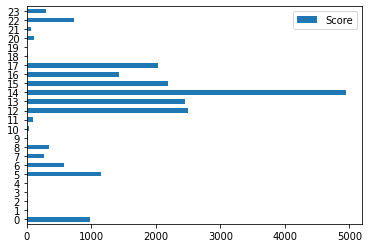

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [0]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 65.9902985146404
Test Prediction  65.81471697145349


In [0]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  67.94666666666667


In [0]:
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  72.87666666666667


In [0]:
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  73.76666666666667


In [0]:
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  67.46


In [0]:
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  69.46333333333334


In [0]:
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  65.32


In [0]:
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  64.49000000000001


In [0]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
8,hop_count,3.325589
18,cache_coherence_flit_index,2.873597
15,packet_count_index,1.968875
6,vc,0.611048
4,flit_type,0.513832
22,vnet_vc_index,0.280025
7,traversal_id,0.238997
20,traversal_index,-0.136661
1,inport,-0.158749
19,flit_index,-0.201537


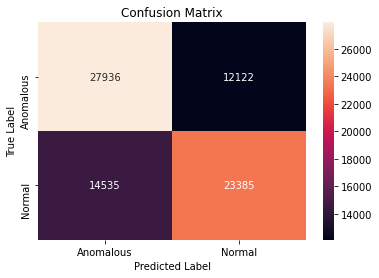

In [0]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68     40058
           1       0.66      0.62      0.64     37920

    accuracy                           0.66     77978
   macro avg       0.66      0.66      0.66     77978
weighted avg       0.66      0.66      0.66     77978



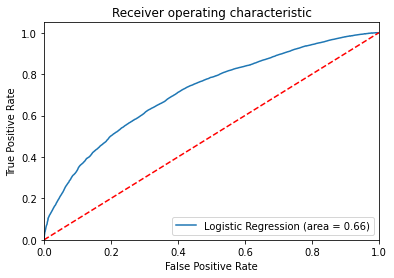

In [0]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

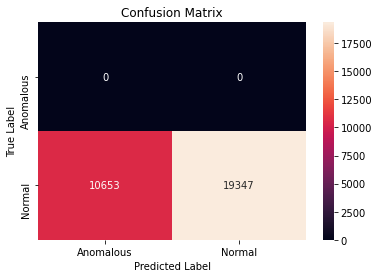

In [0]:
cm = confusion_matrix(test_Y6, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.64      0.78     30000

    accuracy                           0.64     30000
   macro avg       0.50      0.32      0.39     30000
weighted avg       1.00      0.64      0.78     30000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [0]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [0]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 87.15018066050892
Test Prediction  80.84459719408038


In [0]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  63.93333333333333


In [0]:
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  60.55666666666667


In [0]:
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  61.33


In [0]:
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  62.68333333333334


In [0]:
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  65.49666666666667


In [0]:
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  52.33


In [0]:
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  79.47666666666666


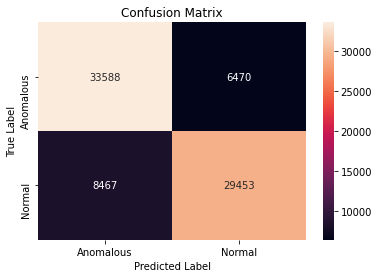

In [0]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82     40058
           1       0.82      0.78      0.80     37920

    accuracy                           0.81     77978
   macro avg       0.81      0.81      0.81     77978
weighted avg       0.81      0.81      0.81     77978



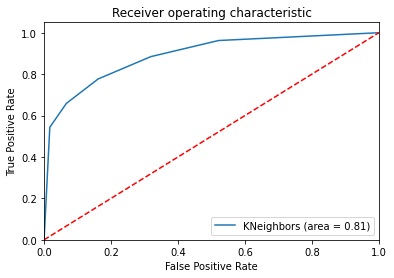

In [0]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

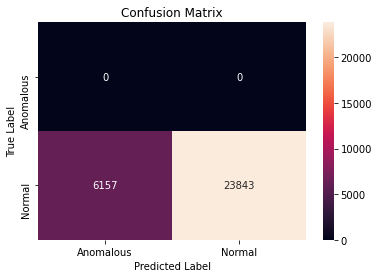

In [0]:
cm = confusion_matrix(test_Y6, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.79      0.89     30000

    accuracy                           0.79     30000
   macro avg       0.50      0.40      0.44     30000
weighted avg       1.00      0.79      0.89     30000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [0]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 60.72693813299307
Test Prediction Score 60.60940265203006


In [0]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 36.18


In [0]:
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  41.85


In [0]:
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  36.94


In [0]:
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  39.193333333333335


In [0]:
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  37.13333333333333


In [0]:
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  43.4


In [0]:
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  88.31666666666666


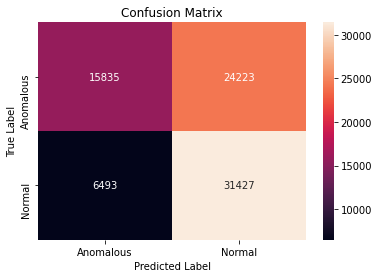

In [0]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.71      0.40      0.51     40058
           1       0.56      0.83      0.67     37920

    accuracy                           0.61     77978
   macro avg       0.64      0.61      0.59     77978
weighted avg       0.64      0.61      0.59     77978



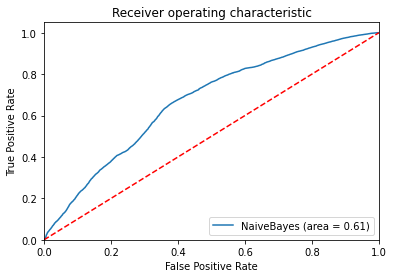

In [0]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

2-Layer Neural Network

In [0]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 249528 samples, validate on 62383 samples
Epoch 1/10
249528/249528 [==============================] - 9s 34us/step - loss: 0.2243 - accuracy: 0.6337 - val_loss: 0.2156 - val_accuracy: 0.6609
Epoch 2/10
249528/249528 [==============================] - 8s 34us/step - loss: 0.2151 - accuracy: 0.6670 - val_loss: 0.2142 - val_accuracy: 0.6651
Epoch 3/10
249528/249528 [==============================] - 8s 33us/step - loss: 0.2147 - accuracy: 0.6672 - val_loss: 0.2138 - val_accuracy: 0.6704
Epoch 4/10
249528/249528 [==============================] - 8s 33us/step - loss: 0.2145 - accuracy: 0.6666 - val_loss: 0.2137 - val_accuracy: 0.6709
Epoch 5/10
249528/249528 [==============================] - 9s 36us/step - loss: 0.2145 - accuracy: 0.6652 - val_loss: 0.2141 - val_accuracy: 0.6642
Epoch 6/10
249528/249528 [==============================] - 9s 36us/step - loss: 0.2143 - accuracy: 0.6645 - val_loss: 0.2141 - val_accuracy: 0.6670
Epoch 7/10
249528/249528 [=============================

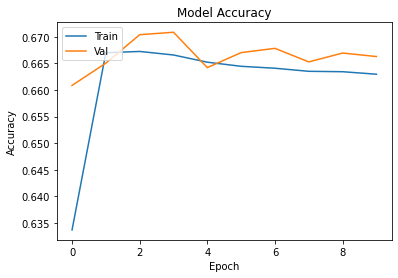

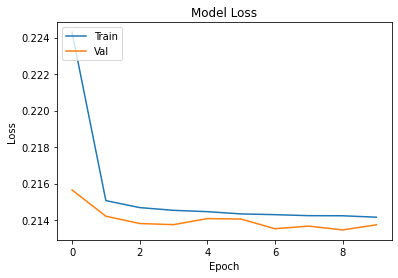

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 66.03%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 65.77%


In [0]:
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 70.97%


In [0]:
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 71.62%


In [0]:
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 63.57%


In [0]:
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 65.46%


In [0]:
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 64.34%


In [0]:
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 67.72%


3-Layer Neural Network

In [0]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 249528 samples, validate on 62383 samples
Epoch 1/30
249528/249528 [==============================] - 9s 34us/step - loss: 0.2480 - accuracy: 0.5411 - val_loss: 0.2468 - val_accuracy: 0.5560
Epoch 2/30
249528/249528 [==============================] - 8s 34us/step - loss: 0.2447 - accuracy: 0.5655 - val_loss: 0.2408 - val_accuracy: 0.5899
Epoch 3/30
249528/249528 [==============================] - 8s 34us/step - loss: 0.2318 - accuracy: 0.6239 - val_loss: 0.2229 - val_accuracy: 0.6458
Epoch 4/30
249528/249528 [==============================] - 8s 34us/step - loss: 0.2190 - accuracy: 0.6575 - val_loss: 0.2168 - val_accuracy: 0.6636
Epoch 5/30
249528/249528 [==============================] - 8s 34us/step - loss: 0.2167 - accuracy: 0.6633 - val_loss: 0.2160 - val_accuracy: 0.6667
Epoch 6/30
249528/249528 [==============================] - 8s 34us/step - loss: 0.2161 - accuracy: 0.6637 - val_loss: 0.2154 - val_accuracy: 0.6615
Epoch 7/30
249528/249528 [=============================

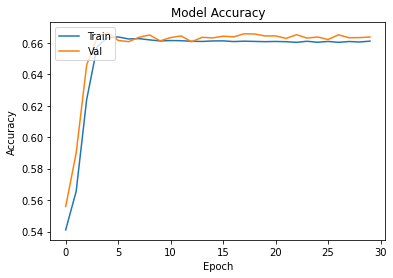

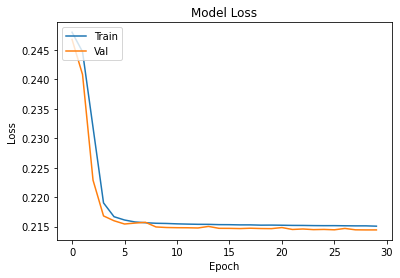

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 65.75%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 70.18%
accuracy: 75.04%
accuracy: 74.77%
accuracy: 70.04%
accuracy: 71.08%
accuracy: 65.93%
accuracy: 64.37%


4-Layer Neural Network



In [0]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 249528 samples, validate on 62383 samples
Epoch 1/30
249528/249528 [==============================] - 9s 36us/step - loss: 0.2482 - accuracy: 0.5530 - val_loss: 0.2451 - val_accuracy: 0.5741
Epoch 2/30
249528/249528 [==============================] - 9s 34us/step - loss: 0.2349 - accuracy: 0.6164 - val_loss: 0.2220 - val_accuracy: 0.6536
Epoch 3/30
249528/249528 [==============================] - 9s 34us/step - loss: 0.2157 - accuracy: 0.6642 - val_loss: 0.2114 - val_accuracy: 0.6749
Epoch 4/30
249528/249528 [==============================] - 9s 34us/step - loss: 0.2100 - accuracy: 0.6705 - val_loss: 0.2072 - val_accuracy: 0.6728
Epoch 5/30
249528/249528 [==============================] - 9s 34us/step - loss: 0.2071 - accuracy: 0.6754 - val_loss: 0.2064 - val_accuracy: 0.6815
Epoch 6/30
249528/249528 [==============================] - 9s 35us/step - loss: 0.2051 - accuracy: 0.6800 - val_loss: 0.2059 - val_accuracy: 0.6822
Epoch 7/30
249528/249528 [=============================

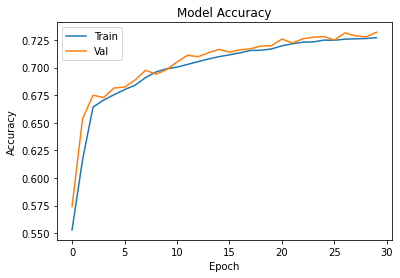

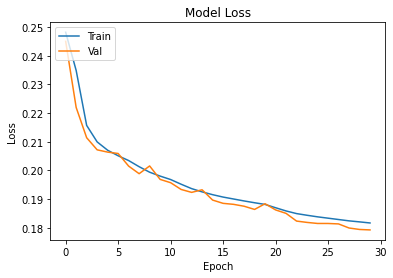

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 72.70%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 76.26%
accuracy: 74.80%
accuracy: 76.45%
accuracy: 70.81%
accuracy: 73.50%
accuracy: 66.08%
accuracy: 68.87%


5-Layer Neural Network Optimized

In [174]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 249528 samples, validate on 62383 samples
Epoch 1/100
249528/249528 [==============================] - 18s 71us/step - loss: 0.2014 - accuracy: 0.6925 - val_loss: 0.1870 - val_accuracy: 0.7272
Epoch 2/100
249528/249528 [==============================] - 16s 64us/step - loss: 0.1839 - accuracy: 0.7247 - val_loss: 0.1689 - val_accuracy: 0.7486
Epoch 3/100
249528/249528 [==============================] - 16s 65us/step - loss: 0.1767 - accuracy: 0.7361 - val_loss: 0.1626 - val_accuracy: 0.7569
Epoch 4/100
249528/249528 [==============================] - 16s 65us/step - loss: 0.1722 - accuracy: 0.7430 - val_loss: 0.1571 - val_accuracy: 0.7649
Epoch 5/100
249528/249528 [==============================] - 16s 64us/step - loss: 0.1685 - accuracy: 0.7507 - val_loss: 0.1555 - val_accuracy: 0.7612
Epoch 6/100
249528/249528 [==============================] - 16s 64us/step - loss: 0.1641 - accuracy: 0.7577 - val_loss: 0.1521 - val_accuracy: 0.7763
Epoch 7/100
249528/249528 [================

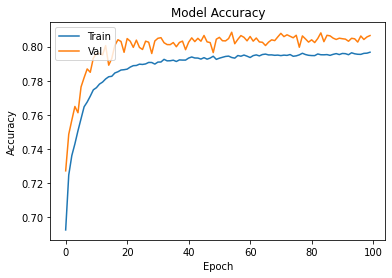

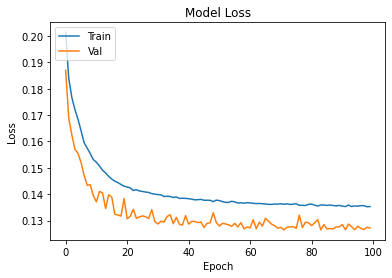

In [175]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [176]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 80.48%


In [177]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 65.69%
accuracy: 65.30%
accuracy: 63.12%
accuracy: 64.87%
accuracy: 74.00%
accuracy: 53.90%
accuracy: 83.43%


In [178]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 249528 samples, validate on 62383 samples
Epoch 1/50
249528/249528 [==============================] - 18s 70us/step - loss: 0.2047 - accuracy: 0.6865 - val_loss: 0.1956 - val_accuracy: 0.7058
Epoch 2/50
249528/249528 [==============================] - 17s 69us/step - loss: 0.1940 - accuracy: 0.7096 - val_loss: 0.1820 - val_accuracy: 0.7307
Epoch 3/50
249528/249528 [==============================] - 17s 70us/step - loss: 0.1849 - accuracy: 0.7257 - val_loss: 0.1784 - val_accuracy: 0.7371
Epoch 4/50
249528/249528 [==============================] - 17s 70us/step - loss: 0.1772 - accuracy: 0.7378 - val_loss: 0.1601 - val_accuracy: 0.7617
Epoch 5/50
249528/249528 [==============================] - 18s 72us/step - loss: 0.1714 - accuracy: 0.7450 - val_loss: 0.1608 - val_accuracy: 0.7640
Epoch 6/50
249528/249528 [==============================] - 17s 69us/step - loss: 0.1673 - accuracy: 0.7505 - val_loss: 0.1534 - val_accuracy: 0.7732
Epoch 7/50
249528/249528 [=======================

In [179]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 80.17%


In [180]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 69.09%
accuracy: 62.10%
accuracy: 61.14%
accuracy: 63.59%
accuracy: 72.96%
accuracy: 53.59%
accuracy: 79.32%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [182]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [184]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 96.78177428817835
Test Prediction Score 92.20934109620661


In [185]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 61.00666666666667
Test Prediction Score 60.85333333333334
Test Prediction Score 57.75
Test Prediction Score 58.24
Test Prediction Score 62.35333333333334
Test Prediction Score 57.37
Test Prediction Score 75.82


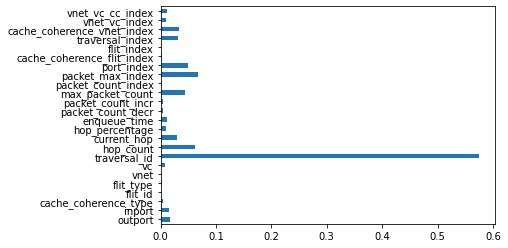

In [186]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

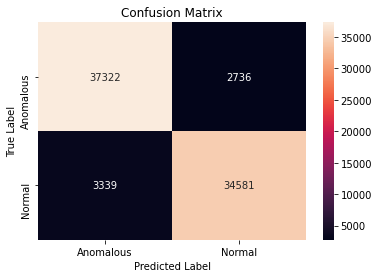

In [187]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [188]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92     40058
           1       0.93      0.91      0.92     37920

    accuracy                           0.92     77978
   macro avg       0.92      0.92      0.92     77978
weighted avg       0.92      0.92      0.92     77978



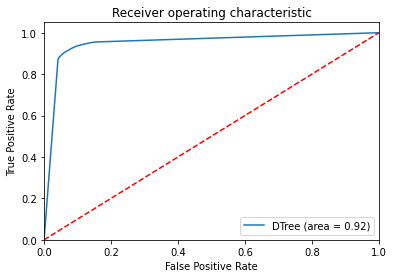

In [189]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [191]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [193]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 98.70027026940377
Test Prediction Score 93.01084921388085


In [194]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 61.93333333333333
Test Prediction Score 62.41
Test Prediction Score 59.34
Test Prediction Score 60.156666666666666
Test Prediction Score 63.91
Test Prediction Score 57.513333333333335
Test Prediction Score 76.67666666666668


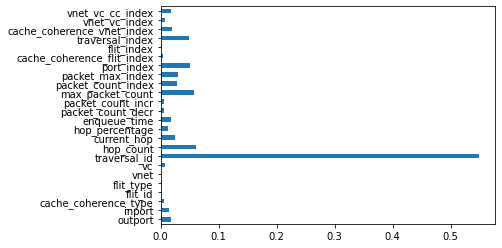

In [195]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

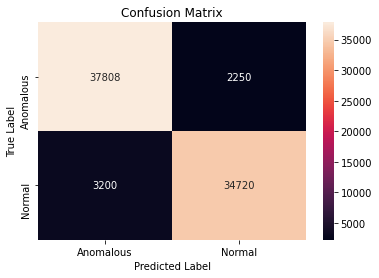

In [196]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [197]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     40058
           1       0.94      0.92      0.93     37920

    accuracy                           0.93     77978
   macro avg       0.93      0.93      0.93     77978
weighted avg       0.93      0.93      0.93     77978



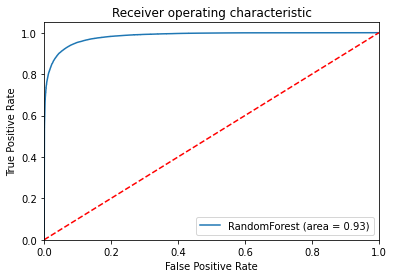

In [198]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [200]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [202]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.31839531148309
Test Prediction Score 95.0344969093847


In [203]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 60.22
Test Prediction Score 61.25666666666667
Test Prediction Score 59.18333333333333
Test Prediction Score 60.33666666666667
Test Prediction Score 63.71
Test Prediction Score 56.86666666666667
Test Prediction Score 74.92666666666666


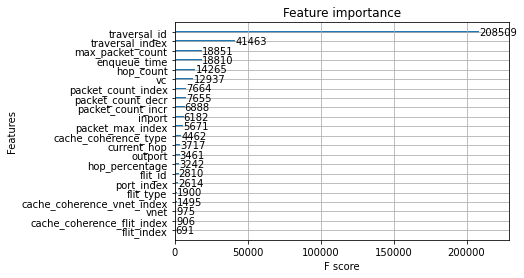

In [204]:
plot_importance(xgbc)
plt.show()

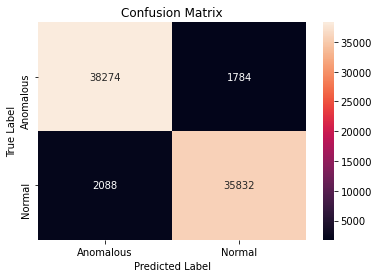

In [205]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [206]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     40058
           1       0.95      0.94      0.95     37920

    accuracy                           0.95     77978
   macro avg       0.95      0.95      0.95     77978
weighted avg       0.95      0.95      0.95     77978



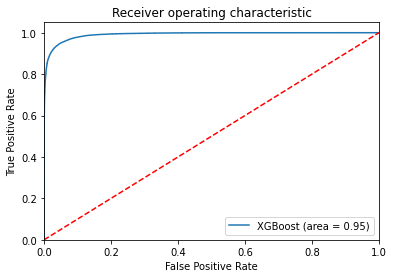

In [207]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [209]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [211]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 86.41279082815291
Test Prediction Score 85.29841750237246


In [212]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 61.72
Test Prediction Score 62.243333333333325
Test Prediction Score 61.21
Test Prediction Score 59.73333333333334
Test Prediction Score 64.2
Test Prediction Score 53.99666666666667
Test Prediction Score 83.56666666666666


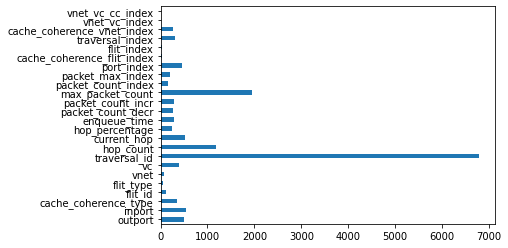

In [213]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

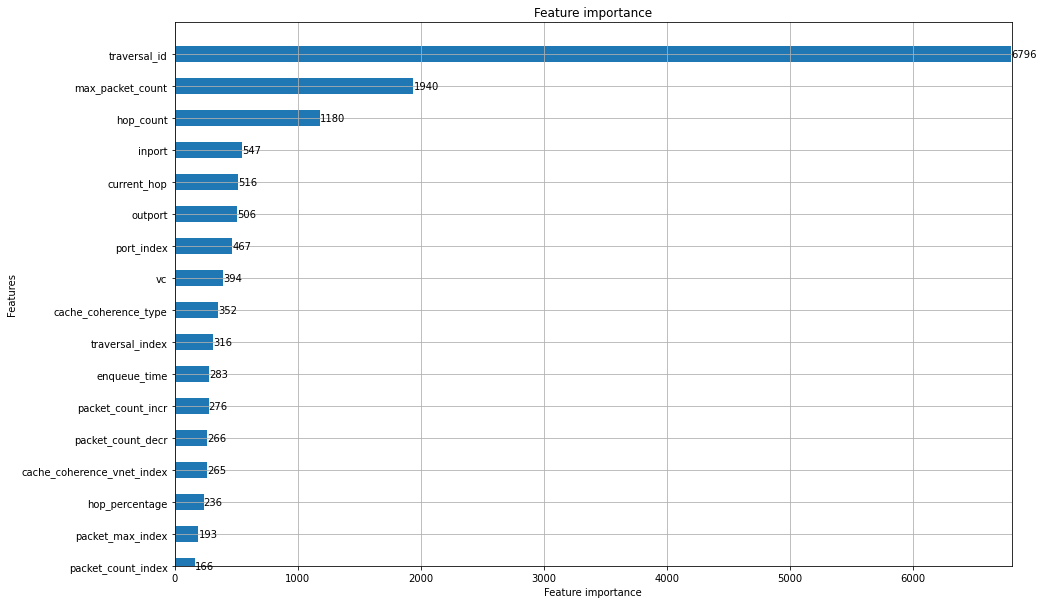

In [214]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [215]:
sorted(gbm.feature_importances_,reverse=True)

[6796,
 1940,
 1180,
 547,
 516,
 506,
 467,
 394,
 352,
 316,
 283,
 276,
 266,
 265,
 236,
 193,
 166,
 109,
 67,
 61,
 35,
 28,
 1,
 0]

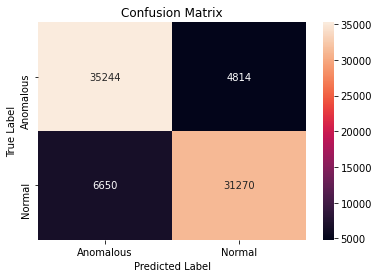

In [216]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [217]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86     40058
           1       0.87      0.82      0.85     37920

    accuracy                           0.85     77978
   macro avg       0.85      0.85      0.85     77978
weighted avg       0.85      0.85      0.85     77978



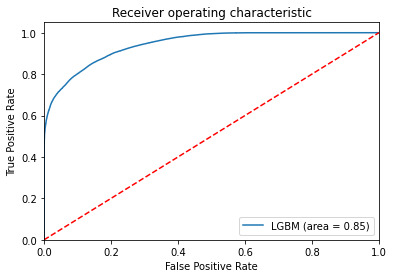

In [218]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()